# Basic Analysis of BSU Shuttles

Import Pandas

In [7]:
import numpy as np

#import Pandas
import pandas as pd

Read CSV files via Pandas

In [109]:
#read CSV files
entries = pd.read_csv("C:/Users/KaliO/OneDrive/Documents/Grad School/Fall 2022/DSCI 689/Bus Project/Bacis Analysis/entries.csv")
loops=pd.read_csv("C:/Users/KaliO/OneDrive/Documents/Grad School/Fall 2022/DSCI 689/Bus Project/Bacis Analysis/loops.csv")

## Find the Busiest Loops for the Whole Year

How to find busiest loops? We'll look at the number of students boarded on the bus by loop.

### Clean Data

Merge entries.csv and loops.csv files, so we will have the loop name within our entries.csv file.

In [110]:
#merge csv files by loop_id
entries_loops = pd.merge(entries, 
                      loops, 
                      on ='loop_id', 
                      how ='inner')
entries_loops

,boarded,stop_id,timestamp,date_added,loop_id,driver_id,id,left_behind,bus_id,is_deleted_x,loop_name,is_deleted_y
0,0,75,1/16/2021 17:00,1/16/2021,9,50,804685,0,8,0,Green Loop,0
1,2,92,1/16/2021 17:23,1/16/2021,9,50,804694,0,8,0,Green Loop,0
2,2,81,1/16/2021 17:38,1/16/2021,9,50,804706,0,8,0,Green Loop,0
3,1,83,1/16/2021 17:44,1/16/2021,9,50,804710,0,8,0,Green Loop,0
4,1,75,1/16/2021 18:00,1/16/2021,9,50,804721,0,8,0,Green Loop,0
...,...,...,...,...,...,...,...,...,...,...,...,...
458786,2,118,12/16/2021 17:48,12/16/2021,12,22,1260704,0,12,0,Demand Response,0
458787,1,99,12/16/2021 17:58,12/16/2021,12,22,1260734,0,12,0,Demand Response,0
458788,1,54,12/16/2021 20:38,12/16/2021,12,22,1261096,0,12,0,Demand Response,0
458789,1,28,12/17/2021 8:56,12/17/2021,12,33,1261593,0,12,0,Demand Response,0


Rename Columns for better visualization

In [111]:
entries_loops.rename(columns={'loop_name':'Loop Name', 'date_added':'Date', 'boarded':'Students Boarded'}, inplace=True)
entries_loops

,Students Boarded,stop_id,timestamp,Date,loop_id,driver_id,id,left_behind,bus_id,is_deleted_x,Loop Name,is_deleted_y
0,0,75,1/16/2021 17:00,1/16/2021,9,50,804685,0,8,0,Green Loop,0
1,2,92,1/16/2021 17:23,1/16/2021,9,50,804694,0,8,0,Green Loop,0
2,2,81,1/16/2021 17:38,1/16/2021,9,50,804706,0,8,0,Green Loop,0
3,1,83,1/16/2021 17:44,1/16/2021,9,50,804710,0,8,0,Green Loop,0
4,1,75,1/16/2021 18:00,1/16/2021,9,50,804721,0,8,0,Green Loop,0
...,...,...,...,...,...,...,...,...,...,...,...,...
458786,2,118,12/16/2021 17:48,12/16/2021,12,22,1260704,0,12,0,Demand Response,0
458787,1,99,12/16/2021 17:58,12/16/2021,12,22,1260734,0,12,0,Demand Response,0
458788,1,54,12/16/2021 20:38,12/16/2021,12,22,1261096,0,12,0,Demand Response,0
458789,1,28,12/17/2021 8:56,12/17/2021,12,33,1261593,0,12,0,Demand Response,0


Drop Unwanted Columns

In [112]:
entries_loops.drop(['is_deleted_x', 'is_deleted_y'], inplace=True, axis=1)
entries_loops

,Students Boarded,stop_id,timestamp,Date,loop_id,driver_id,id,left_behind,bus_id,Loop Name
0,0,75,1/16/2021 17:00,1/16/2021,9,50,804685,0,8,Green Loop
1,2,92,1/16/2021 17:23,1/16/2021,9,50,804694,0,8,Green Loop
2,2,81,1/16/2021 17:38,1/16/2021,9,50,804706,0,8,Green Loop
3,1,83,1/16/2021 17:44,1/16/2021,9,50,804710,0,8,Green Loop
4,1,75,1/16/2021 18:00,1/16/2021,9,50,804721,0,8,Green Loop
...,...,...,...,...,...,...,...,...,...,...
458786,2,118,12/16/2021 17:48,12/16/2021,12,22,1260704,0,12,Demand Response
458787,1,99,12/16/2021 17:58,12/16/2021,12,22,1260734,0,12,Demand Response
458788,1,54,12/16/2021 20:38,12/16/2021,12,22,1261096,0,12,Demand Response
458789,1,28,12/17/2021 8:56,12/17/2021,12,33,1261593,0,12,Demand Response


### Show By Each Day (date)

For a basic view of busiest loop, let's group by loop_name and summarize our data points.

In [94]:
#group & summarize by loop names
entries_loops.groupby('Loop Name')['Students Boarded'].sum()

Loop Name
Blue Loop           46034
Demand Response      5049
Green Loop         253669
Orange Loop         86637
Red Loop           124039
Sunday Green        10037
Sunday Orange       13683
Name: Students Boarded, dtype: int64

To begin looking at busiest loop by day, let's group by date_added then loop_name

In [118]:
#group and summarize by date
by_date = entries_loops.groupby(['Date','Loop Name']).sum()
by_date

Students Boarded  stop_id  loop_id  driver_id  \
Date      Loop Name                                                        
1/16/2021 Blue Loop                       2    13857     3060       8748   
          Green Loop                     37     9786     1107       3882   
1/17/2021 Blue Loop                      16    15487     3420       9768   
          Green Loop                    263    11437     1296       3070   
1/18/2021 Blue Loop                      21    14762     3255       6732   
...                                     ...      ...      ...        ...   
9/9/2021  Blue Loop                     252    30728     6795      20177   
          Demand Response                11      607      120        280   
          Green Loop                   2256    94722    10422      22984   
          Orange Loop                   492    40438     5346      16608   
          Red Loop                     1192    55947     6660      30425   

                                   id  left_behind  bus_id  
Date      Loop Name                                         
1/16/2021 Blue Loop         164184113            0    3468  
          Green Loop         99001183            0     984  
1/17/2021 Blue Loop         183579071            0    3876  
          Green Loop        115954399           13    1008  
1/18/2021 Blue Loop         174854020            0    2825  
...                               ...          ...     ...  
9/9/2021  Blue Loop         489473601            0    7701  
          Demand Response    10803941            0     116  
          Green Loop       1251335731           38    9300  
          Orange Loop       525240318            0    7776  
          Red Loop          719469964            6    3630  

[891 rows x 7 columns]

Since we need to show data by busiest to least, we need to sort our findings. We'll sort descending by boarded, so we know the busiest loop day.

In [119]:
#sort ascending by date and descending by boarded
sby_date = by_date.sort_values('Students Boarded', ascending=False)
sby_date

Students Boarded  stop_id  loop_id  driver_id  \
Date       Loop Name                                                      
2/9/2021   Orange Loop               17546  1140962   156442     213508   
11/1/2021  Green Loop                 3274   118424    13095      40211   
9/1/2021   Green Loop                 2882    92586    10188      23400   
9/17/2021  Green Loop                 2751    90956    10026      35950   
9/29/2021  Green Loop                 2673    92840    10215      25867   
...                                    ...      ...      ...        ...   
3/14/2021  Orange Loop                   0       87       11         36   
12/13/2021 Sunday Green                  0       84       16         53   
           Sunday Orange                 0       86       14         36   
10/31/2021 Orange Loop                   0       87       11         36   
2/14/2021  Orange Loop                   0       87       11         36   

                                   id  left_behind  bus_id  
Date       Loop Name                                        
2/9/2021   Orange Loop    12205784901            0   99554  
11/1/2021  Green Loop      1711641887            0   15368  
9/1/2021   Green Loop      1207397309           61   11989  
9/17/2021  Green Loop      1222185391           43   10639  
9/29/2021  Green Loop      1270920436           66   13204  
...                               ...          ...     ...  
3/14/2021  Orange Loop         932584            0      14  
12/13/2021 Sunday Green       1250806            0      17  
           Sunday Orange      1250805            0       9  
10/31/2021 Orange Loop        1174132            0      13  
2/14/2021  Orange Loop         874543            0      15  

[891 rows x 7 columns]

# Busiest Loop by Month

Before we can get our new Month column, we need to convert the Timestamp column to datetime format.

In [113]:
entries_loops['timestamp']=pd.to_datetime(entries_loops['timestamp'])

In [106]:
entries_loops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458791 entries, 0 to 458790
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Students Boarded  458791 non-null  int64         
 1   stop_id           458791 non-null  int64         
 2   timestamp         458791 non-null  datetime64[ns]
 3   Date              458791 non-null  object        
 4   loop_id           458791 non-null  int64         
 5   driver_id         458791 non-null  int64         
 6   id                458791 non-null  int64         
 7   left_behind       458791 non-null  int64         
 8   bus_id            458791 non-null  int64         
 9   Loop Name         458791 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 58.5+ MB


Now, let's create our new column 'Month' based on the new timestamp formatted column.

In [114]:
entries_loops['Month']=entries_loops['timestamp'].dt.month_name()

In [115]:
entries_loops

,Students Boarded,stop_id,timestamp,Date,loop_id,driver_id,id,left_behind,bus_id,Loop Name,Month
0,0,75,2021-01-16 17:00:00,1/16/2021,9,50,804685,0,8,Green Loop,January
1,2,92,2021-01-16 17:23:00,1/16/2021,9,50,804694,0,8,Green Loop,January
2,2,81,2021-01-16 17:38:00,1/16/2021,9,50,804706,0,8,Green Loop,January
3,1,83,2021-01-16 17:44:00,1/16/2021,9,50,804710,0,8,Green Loop,January
4,1,75,2021-01-16 18:00:00,1/16/2021,9,50,804721,0,8,Green Loop,January
...,...,...,...,...,...,...,...,...,...,...,...
458786,2,118,2021-12-16 17:48:00,12/16/2021,12,22,1260704,0,12,Demand Response,December
458787,1,99,2021-12-16 17:58:00,12/16/2021,12,22,1260734,0,12,Demand Response,December
458788,1,54,2021-12-16 20:38:00,12/16/2021,12,22,1261096,0,12,Demand Response,December
458789,1,28,2021-12-17 08:56:00,12/17/2021,12,33,1261593,0,12,Demand Response,December


Let's group our data by the newly created column 'Month' then by the loop name.

In [63]:
#group and summarize by Month
by_month = entries_loops.groupby(['Month','loop_name']).sum()
by_month

boarded  stop_id  loop_id  driver_id           id  \
Month     loop_name                                                            
April     Blue Loop           4912   719912   158040     371026  10567516190   
          Demand Response      737    34687     5736      13554    478729785   
          Green Loop         23848  2081496   229347     628499  25539242454   
          Orange Loop         7946   754068    99847     208677   9105059472   
          Red Loop           10256  1133835   135200     596107  13545328844   
...                            ...      ...      ...        ...          ...   
September Green Loop         49016  1930002   212418     543668  25835035726   
          Orange Loop        11080   797996   105589     318918  10507384155   
          Red Loop           22778  1035004   123200     583802  13475505294   
          Sunday Green        2279   102132    19968      39481   1365265141   
          Sunday Orange       2080   117128    19516      59258   1521945103   

                           left_behind  bus_id  is_deleted_x  is_deleted_y  
Month     loop_name                                                         
April     Blue Loop                  0  161040             0             0  
          Demand Response            0    5310             0             0  
          Green Loop                53  234631             0             0  
          Orange Loop                0   97068             0             0  
          Red Loop                   0  136991             0             0  
...                                ...     ...           ...           ...  
September Green Loop               476  222584             0             0  
          Orange Loop                1  130763             0             0  
          Red Loop                  83  109016             0             0  
          Sunday Green               0   14567             0             0  
          Sunday Orange             30   16468             0             0  

[70 rows x 9 columns]

Sort our data by Month then boarded, to get our busiest loops each month.

In [120]:
#sort ascending by month and descending by boarded
sby_month = by_month.sort_values('boarded', ascending=False)
sby_month

,,boarded,stop_id,loop_id,driver_id,id,left_behind,bus_id,is_deleted_x,is_deleted_y
Month,loop_name,,,,,,,,,
September,Green Loop,49016,1930002,212418,543668,25835035726,476,222584,0,0
October,Green Loop,41596,1703169,187506,510232,23940883072,330,203961,0,0
November,Green Loop,39512,1824896,200907,618171,26819458819,275,217020,0,0
March,Green Loop,26305,2264283,256671,687655,26741133706,46,269123,0,0
April,Green Loop,23848,2081496,229347,628499,25539242454,53,234631,0,0
...,...,...,...,...,...,...,...,...,...,...
December,Demand Response,223,10666,2064,4767,213973368,0,1937,0,0
January,Demand Response,196,8926,1776,3566,121241356,0,1565,0,0
August,Demand Response,169,9005,1596,3789,140373510,0,1471,0,0


## Busiest Loop by Semester

Determine Semester

# Most crowded stops the whole year

Read in stops.csv file, so we can merge with entries.csv

In [144]:
stops=pd.read_csv("C:/Users/KaliO/OneDrive/Documents/Grad School/Fall 2022/DSCI 689/Bus Project/Bacis Analysis/stops.csv")

Merge csv files

In [156]:
#merge csv files by loop_id
entries_stops = pd.merge(entries, 
                      stops, 
                      on ='stop_id', 
                      how ='inner')
entries_stops

,boarded,stop_id,timestamp,date_added,loop_id,driver_id,id,left_behind,bus_id,is_deleted_x,stop_name,is_deleted_y
0,0,75,1/16/2021 17:00,1/16/2021,9,50,804685,0,8,0,Baseball #1,0
1,1,75,1/16/2021 18:00,1/16/2021,9,50,804721,0,8,0,Baseball #1,0
2,1,75,1/16/2021 19:00,1/16/2021,9,50,804765,0,8,0,Baseball #1,0
3,0,75,1/16/2021 20:02,1/16/2021,9,29,804808,0,8,0,Baseball #1,0
4,0,75,1/16/2021 20:39,1/16/2021,9,29,804846,0,8,0,Baseball #1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
458786,2,125,9/28/2021 11:22,9/28/2021,12,33,1116621,0,12,0,Showalter,0
458787,1,125,10/29/2021 11:51,10/29/2021,12,22,1172691,0,10,0,Showalter,0
458788,1,112,11/15/2021 14:57,11/15/2021,12,33,1205218,0,11,0,Rehab Center,0
458789,2,112,12/6/2021 10:55,12/6/2021,12,33,1237589,0,11,0,Rehab Center,0


Rename Columns

In [159]:
entries_stops.rename(columns={'stop_name':'Stop Name', 'date_added':'Date', 'boarded':'Students Boarded'}, inplace=True)

Drop unwanted Columns

In [158]:
entries_stops.drop(['is_deleted_x', 'is_deleted_y','left_behind','driver_id', 'loop_id'], inplace=True, axis=1)
entries_stops

,Students Boarded,stop_id,timestamp,Date,id,bus_id,Stop Name
0,0,75,1/16/2021 17:00,1/16/2021,804685,8,Baseball #1
1,1,75,1/16/2021 18:00,1/16/2021,804721,8,Baseball #1
2,1,75,1/16/2021 19:00,1/16/2021,804765,8,Baseball #1
3,0,75,1/16/2021 20:02,1/16/2021,804808,8,Baseball #1
4,0,75,1/16/2021 20:39,1/16/2021,804846,8,Baseball #1
...,...,...,...,...,...,...,...
458786,2,125,9/28/2021 11:22,9/28/2021,1116621,12,Showalter
458787,1,125,10/29/2021 11:51,10/29/2021,1172691,10,Showalter
458788,1,112,11/15/2021 14:57,11/15/2021,1205218,11,Rehab Center
458789,2,112,12/6/2021 10:55,12/6/2021,1237589,11,Rehab Center


To find the most crowded stops we will, again, look at Students Boarded.

Let's take a generalized look at the stops overall.

In [160]:
#group & summarize by loop names
entries_stops.groupby('Stop Name')['Students Boarded'].sum()

Stop Name
AJ                         33707
Administration Building        1
Alumni                      1727
Anthony Apts                  49
Anthony N-B                 3264
                           ...  
Student Rec Cntr              53
Teachers College              61
Whitinger                     15
Woodworth                     31
Worthen Arena                 14
Name: Students Boarded, Length: 87, dtype: int64

Since we want to look at by day (date), we will group by Date then Stop Name

In [162]:
#group and summarize by date
stby_date = entries_stops.groupby(['Date','Stop Name']).sum()
stby_date

Students Boarded  stop_id         id  bus_id
Date      Stop Name                                                      
1/16/2021 AJ                                0     1817   18511359     337
          Alumni                            0      370    4024513      40
          Anthony N-B                       0      420    4024505      40
          Anthony S-B                       0      492    4829385      48
          Ashland                           1      581    5634176      56
...                                       ...      ...        ...     ...
9/9/2021  Shaffer Tower N-B               338    12560  169637102    1327
          Shaffer Tower S-B               224    15957  212859264    1969
          South Shelter                   230     6992   99421263     974
          South Shelter N-B               152     6188   73459266     373
          Stadium                         150     5612   65916616     491

[7292 rows x 4 columns]

To show our data by most crowded first, we will sort the data descending by Students Boarded

In [163]:
#sort ascending by date and descending by boarded
sstby_date = by_date.sort_values('Students Boarded', ascending=False)
sstby_date

Students Boarded  stop_id          id  bus_id
Date       Stop Name                                                       
2/9/2021   Music                          5092    81103   953314605    7951
           Shaffer Tower N-B              2358    88080   944770751    7876
           LaFollette N-B                 1882   136118  1648347558   13779
           Ashland                        1647    83332   861532443    7200
           AJ                             1462    74892   813315639    7095
...                                        ...      ...         ...     ...
11/28/2021 SR-1                              0      710    12227664     150
           North Shelter                     0     1860    24454978     170
4/9/2021   Baseball #2                       0     1914    21781645     178
11/28/2021 Alumni                            0      814    13450284     165
1/16/2021  AJ                                0     1817    18511359     337

[7292 rows x 4 columns]

## By Month

Before we can groupby month, we need to turn our timestamp into a datetime pandas options

In [164]:
entries_stops['timestamp']=pd.to_datetime(entries_stops['timestamp'])

Use the newly converted column timestamp to a new column, to show month only.

In [166]:
entries_stops['Month']=entries_stops['timestamp'].dt.month_name()
entries_stops

,Students Boarded,stop_id,timestamp,Date,id,bus_id,Stop Name,Month
0,0,75,2021-01-16 17:00:00,1/16/2021,804685,8,Baseball #1,January
1,1,75,2021-01-16 18:00:00,1/16/2021,804721,8,Baseball #1,January
2,1,75,2021-01-16 19:00:00,1/16/2021,804765,8,Baseball #1,January
3,0,75,2021-01-16 20:02:00,1/16/2021,804808,8,Baseball #1,January
4,0,75,2021-01-16 20:39:00,1/16/2021,804846,8,Baseball #1,January
...,...,...,...,...,...,...,...,...
458786,2,125,2021-09-28 11:22:00,9/28/2021,1116621,12,Showalter,September
458787,1,125,2021-10-29 11:51:00,10/29/2021,1172691,10,Showalter,October
458788,1,112,2021-11-15 14:57:00,11/15/2021,1205218,11,Rehab Center,November
458789,2,112,2021-12-06 10:55:00,12/6/2021,1237589,11,Rehab Center,December


Let's group our data by Month then Stops

In [167]:
#group and summarize by Month
stby_month = entries_stops.groupby(['Month','Stop Name']).sum()
stby_month

Students Boarded  stop_id          id  bus_id
Month     Stop Name                                                      
April     AJ                            3389   337962  4287851459   46969
          Alumni                          69   103822  1405932652   13051
          Anthony Apts                     1       23     1023628      12
          Anthony N-B                    215   169428  2021377211   19522
          Anthony S-B                    731   170150  2079720469   19997
...                                      ...      ...         ...     ...
September Student Rec Cntr                 4      141     3283762      30
          Teachers College                11      360     9823293     101
          Whitinger                        9      366     6488315      68
          Woodworth                        6      120     4366192      47
          Worthen Arena                    2       20     1109841      12

[594 rows x 4 columns]

Now let's sort by most crowded stop

In [170]:
#sort ascending by month and descending by boarded
sstby_month = stby_month.sort_values('Students Boarded', ascending=False)
sstby_month

Students Boarded  stop_id          id  bus_id
Month     Stop Name                                                           
September Music                             13942   234038  3508168240   32423
November  North Dining Hall                 13071   354118  3606560425   31182
          Music                             13039   221044  3638029337   31458
February  Music                             12790   302512  3594695260   39394
September North Dining Hall                 12769   381140  3534303720   32587
...                                           ...      ...         ...     ...
August    North Residence Hall                  1      119     1046782      12
October   Service & Stores                      1       49     1168256      12
February  Arts & Comm                           1       33      837089      12
October   North Residence                       1      154     1144886      12
February  Kitselman Center                      0       31      879928      12

[594 rows x 4 columns]

In [197]:
plot_df = entries_stops.groupby('Month').sum()
splot_df= plot_df.sort_values('Students Boarded', ascending=False)

<AxesSubplot:xlabel='Month'>

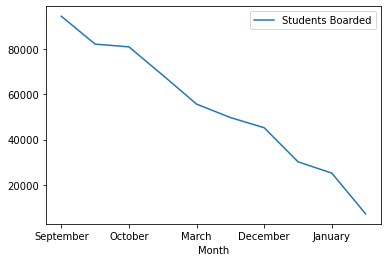

In [198]:
splot_df.plot(y='Students Boarded')

<AxesSubplot:xlabel='Month'>

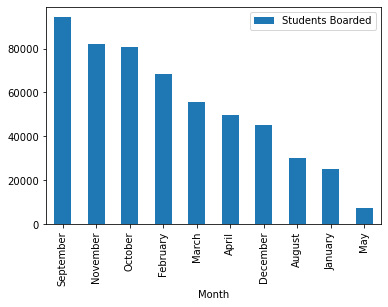

In [199]:
splot_df.plot.bar(y='Students Boarded',stacked=True)

## By Semester

Determine the definition of semester

# The busiest hours

To determine the busiest hours, let's use the timestamp column and pull 'hour' and sum boarded as our value.

We'll utilize a full dataset to do this portion; let's merge our two previous merged datasets.

In [201]:
entries_full=pd.merge(entries_loops, 
                      stops, 
                      on ='stop_id', 
                      how ='inner')
entries_full

,Students Boarded,stop_id,timestamp,Date,loop_id,driver_id,id,left_behind,bus_id,Loop Name,Month,quarter,semester,stop_name,is_deleted
0,0,75,2021-01-16 17:00:00,1/16/2021,9,50,804685,0,8,Green Loop,January,1,1,Baseball #1,0
1,1,75,2021-01-16 18:00:00,1/16/2021,9,50,804721,0,8,Green Loop,January,1,1,Baseball #1,0
2,1,75,2021-01-16 19:00:00,1/16/2021,9,50,804765,0,8,Green Loop,January,1,1,Baseball #1,0
3,0,75,2021-01-16 20:02:00,1/16/2021,9,29,804808,0,8,Green Loop,January,1,1,Baseball #1,0
4,0,75,2021-01-16 20:39:00,1/16/2021,9,29,804846,0,8,Green Loop,January,1,1,Baseball #1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458786,2,125,2021-09-28 11:22:00,9/28/2021,12,33,1116621,0,12,Demand Response,September,3,2,Showalter,0
458787,1,125,2021-10-29 11:51:00,10/29/2021,12,22,1172691,0,10,Demand Response,October,4,2,Showalter,0
458788,1,112,2021-11-15 14:57:00,11/15/2021,12,33,1205218,0,11,Demand Response,November,4,2,Rehab Center,0
458789,2,112,2021-12-06 10:55:00,12/6/2021,12,33,1237589,0,11,Demand Response,December,4,2,Rehab Center,0


Remove unwanted columnds

In [206]:
entries_full.drop(['is_deleted', 'stop_id','left_behind','driver_id', 'loop_id','id','bus_id'], inplace=True, axis=1)
entries_full

,Students Boarded,timestamp,Date,Loop Name,Month,quarter,semester,stop_name,Hour
0,0,2021-01-16 17:00:00,1/16/2021,Green Loop,January,1,1,Baseball #1,17
1,1,2021-01-16 18:00:00,1/16/2021,Green Loop,January,1,1,Baseball #1,18
2,1,2021-01-16 19:00:00,1/16/2021,Green Loop,January,1,1,Baseball #1,19
3,0,2021-01-16 20:02:00,1/16/2021,Green Loop,January,1,1,Baseball #1,20
4,0,2021-01-16 20:39:00,1/16/2021,Green Loop,January,1,1,Baseball #1,20
...,...,...,...,...,...,...,...,...,...
458786,2,2021-09-28 11:22:00,9/28/2021,Demand Response,September,3,2,Showalter,11
458787,1,2021-10-29 11:51:00,10/29/2021,Demand Response,October,4,2,Showalter,11
458788,1,2021-11-15 14:57:00,11/15/2021,Demand Response,November,4,2,Rehab Center,14
458789,2,2021-12-06 10:55:00,12/6/2021,Demand Response,December,4,2,Rehab Center,10


Rename Columns

In [207]:
entries_full.rename(columns={'stop_name':'Stop Name', 'quarter':'Quarter', 'semester':'Semester'}, inplace=True)

Convert timestamp to datetime value

In [208]:
entries_full['timestamp']=pd.to_datetime(entries_full['timestamp'])

Create new column for 'Hour'

In [209]:
entries_full['Hour']=entries_full['timestamp'].dt.hour
entries_full

,Students Boarded,timestamp,Date,Loop Name,Month,Quarter,Semester,Stop Name,Hour
0,0,2021-01-16 17:00:00,1/16/2021,Green Loop,January,1,1,Baseball #1,17
1,1,2021-01-16 18:00:00,1/16/2021,Green Loop,January,1,1,Baseball #1,18
2,1,2021-01-16 19:00:00,1/16/2021,Green Loop,January,1,1,Baseball #1,19
3,0,2021-01-16 20:02:00,1/16/2021,Green Loop,January,1,1,Baseball #1,20
4,0,2021-01-16 20:39:00,1/16/2021,Green Loop,January,1,1,Baseball #1,20
...,...,...,...,...,...,...,...,...,...
458786,2,2021-09-28 11:22:00,9/28/2021,Demand Response,September,3,2,Showalter,11
458787,1,2021-10-29 11:51:00,10/29/2021,Demand Response,October,4,2,Showalter,11
458788,1,2021-11-15 14:57:00,11/15/2021,Demand Response,November,4,2,Rehab Center,14
458789,2,2021-12-06 10:55:00,12/6/2021,Demand Response,December,4,2,Rehab Center,10


Another new column, to display Day

In [211]:
entries_full['Day']=entries_full['timestamp'].dt.day_name()
entries_full

,Students Boarded,timestamp,Date,Loop Name,Month,Quarter,Semester,Stop Name,Hour,Day
0,0,2021-01-16 17:00:00,1/16/2021,Green Loop,January,1,1,Baseball #1,17,Saturday
1,1,2021-01-16 18:00:00,1/16/2021,Green Loop,January,1,1,Baseball #1,18,Saturday
2,1,2021-01-16 19:00:00,1/16/2021,Green Loop,January,1,1,Baseball #1,19,Saturday
3,0,2021-01-16 20:02:00,1/16/2021,Green Loop,January,1,1,Baseball #1,20,Saturday
4,0,2021-01-16 20:39:00,1/16/2021,Green Loop,January,1,1,Baseball #1,20,Saturday
...,...,...,...,...,...,...,...,...,...,...
458786,2,2021-09-28 11:22:00,9/28/2021,Demand Response,September,3,2,Showalter,11,Tuesday
458787,1,2021-10-29 11:51:00,10/29/2021,Demand Response,October,4,2,Showalter,11,Friday
458788,1,2021-11-15 14:57:00,11/15/2021,Demand Response,November,4,2,Rehab Center,14,Monday
458789,2,2021-12-06 10:55:00,12/6/2021,Demand Response,December,4,2,Rehab Center,10,Monday


Let's look at busiest hour per hour and date using a pivot table

In [228]:
table = pd.pivot_table(entries_full, values='Students Boarded', index=['Date','Hour'], aggfunc=np.sum)
table

Students Boarded
Date      Hour                  
1/16/2021 17                   6
          18                  14
          19                  12
          20                   1
          21                   6
...                          ...
9/9/2021  19                 156
          20                 197
          21                 105
          22                  72
          23                   5

[2841 rows x 1 columns]

Sort by busiest hour by day

In [232]:
s_table = table.reindex(table['Students Boarded'].sort_values(ascending=False).index)
s_table

Students Boarded
Date      Hour                  
2/9/2021  16                5846
          15                4028
          18                3642
          14                2058
          13                1770
...                          ...
4/21/2021 6                    0
4/20/2021 23                   0
2/25/2021 23                   0
4/2/2021  21                   0
1/27/2021 23                   0

[2841 rows x 1 columns]

Show busiest hour by day of week

In [235]:
hr_table = pd.pivot_table(entries_full, values='Students Boarded', index=['Day','Hour'], aggfunc=np.sum)
hr_table

Students Boarded
Day       Hour                  
Friday    6                    0
          7                 2197
          8                 5701
          9                 6358
          10                7351
...                          ...
Wednesday 19                5649
          20                3542
          21                2597
          22                1614
          23                  56

[104 rows x 1 columns]

In [237]:
shr_table = hr_table.reindex(hr_table['Students Boarded'].sort_values(ascending=False).index)
shr_table

Students Boarded
Day       Hour                  
Tuesday   15               14972
          16               14311
          13               11691
Thursday  15               11359
Tuesday   18               10952
...                          ...
Monday    6                    0
Saturday  23                   0
Tuesday   6                    0
Wednesday 6                    0
Friday    6                    0

[104 rows x 1 columns]

In [240]:
plot_table = pd.pivot_table(entries_full, values='Students Boarded', index=['Hour'], aggfunc=np.sum)

<AxesSubplot:xlabel='Hour'>

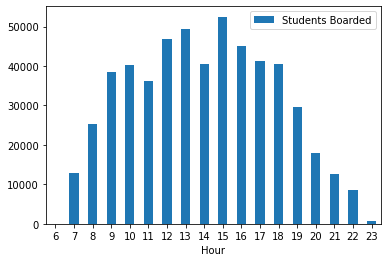

In [246]:
plot_table.plot.bar()